# Libraries

In [1]:
import torch
import torch.optim as optim
from torchsummary import summary

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [2]:
from dataset import CIFAR10

In [3]:
data = CIFAR10()

Files already downloaded and verified
Files already downloaded and verified


# Data Loading and Transforms

In [4]:
train_loader , test_loader = data.get_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [5]:
from utils import get_device, visualize_data

In [6]:
device = get_device()

Device :  cuda


In [7]:
classes = [
            "plane",
            "car",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]

# Visualizing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


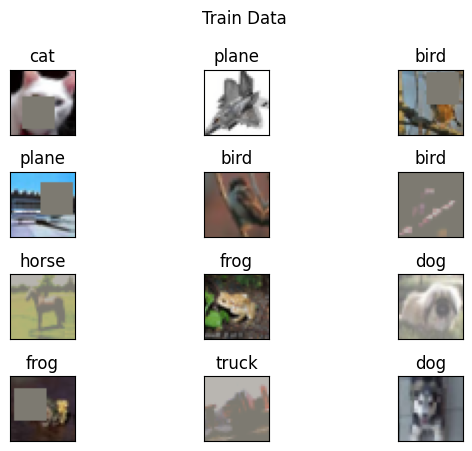

In [8]:
visualize_data(train_loader, 12, "Train Data", classes)

# Model

In [9]:
from model import Model

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [11]:
model = Model().to(device)

In [12]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 32, 32]             648
       BatchNorm2d-2           [-1, 24, 32, 32]              48
           Dropout-3           [-1, 24, 32, 32]               0
              ReLU-4           [-1, 24, 32, 32]               0
            Conv2d-5           [-1, 24, 32, 32]             216
       BatchNorm2d-6           [-1, 24, 32, 32]              48
           Dropout-7           [-1, 24, 32, 32]               0
              ReLU-8           [-1, 24, 32, 32]               0
            Conv2d-9           [-1, 24, 32, 32]             576
           Conv2d-10           [-1, 32, 30, 30]           6,912
      BatchNorm2d-11           [-1, 32, 30, 30]              64
          Dropout-12           [-1, 32, 30, 30]               0
             ReLU-13           [-1, 32, 30, 30]               0
           Conv2d-14           [-1, 32,

# Training - Testing Loops

In [13]:
from backprop import (
    train,
    test,
    plot_graphs,
    get_misclassified_images,
    show_misclassified_images
)

In [14]:
model =  Model().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=1, verbose=True, factor=0.1)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 50

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test_loss = test(model, device, test_loader, test_losses, test_acc)
    scheduler.step(test_loss)

EPOCH: 0


Loss=1.4400501251220703 Batch_id=390 Accuracy=42.05: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s]



Test set: Average loss: 1.2889, Accuracy: 5383/10000 (53.83%)

EPOCH: 1


Loss=1.277252435684204 Batch_id=390 Accuracy=55.93: 100%|██████████| 391/391 [00:28<00:00, 13.85it/s]



Test set: Average loss: 0.9287, Accuracy: 6738/10000 (67.38%)

EPOCH: 2


Loss=0.9867437481880188 Batch_id=390 Accuracy=61.38: 100%|██████████| 391/391 [00:27<00:00, 14.08it/s]



Test set: Average loss: 0.8654, Accuracy: 6941/10000 (69.41%)

EPOCH: 3


Loss=0.906439483165741 Batch_id=390 Accuracy=64.93: 100%|██████████| 391/391 [00:27<00:00, 13.99it/s]



Test set: Average loss: 0.7555, Accuracy: 7336/10000 (73.36%)

EPOCH: 4


Loss=0.9690613746643066 Batch_id=390 Accuracy=67.17: 100%|██████████| 391/391 [00:27<00:00, 14.20it/s]



Test set: Average loss: 0.7119, Accuracy: 7509/10000 (75.09%)

EPOCH: 5


Loss=1.1294372081756592 Batch_id=390 Accuracy=68.98: 100%|██████████| 391/391 [00:27<00:00, 14.00it/s]



Test set: Average loss: 0.6927, Accuracy: 7584/10000 (75.84%)

EPOCH: 6


Loss=0.7869104146957397 Batch_id=390 Accuracy=69.82: 100%|██████████| 391/391 [00:29<00:00, 13.23it/s]



Test set: Average loss: 0.6403, Accuracy: 7766/10000 (77.66%)

EPOCH: 7


Loss=0.7512691617012024 Batch_id=390 Accuracy=70.84: 100%|██████████| 391/391 [00:28<00:00, 13.64it/s]



Test set: Average loss: 0.6325, Accuracy: 7778/10000 (77.78%)

EPOCH: 8


Loss=0.6526995897293091 Batch_id=390 Accuracy=71.87: 100%|██████████| 391/391 [00:28<00:00, 13.82it/s]



Test set: Average loss: 0.6165, Accuracy: 7841/10000 (78.41%)

EPOCH: 9


Loss=0.8563467860221863 Batch_id=390 Accuracy=72.55: 100%|██████████| 391/391 [00:27<00:00, 14.20it/s]



Test set: Average loss: 0.6022, Accuracy: 7957/10000 (79.57%)

EPOCH: 10


Loss=0.672118067741394 Batch_id=390 Accuracy=73.18: 100%|██████████| 391/391 [00:27<00:00, 14.19it/s]



Test set: Average loss: 0.5885, Accuracy: 7949/10000 (79.49%)

EPOCH: 11


Loss=0.7178815603256226 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]



Test set: Average loss: 0.5923, Accuracy: 7947/10000 (79.47%)

EPOCH: 12


Loss=0.7440615892410278 Batch_id=390 Accuracy=74.81: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]



Test set: Average loss: 0.5803, Accuracy: 8024/10000 (80.24%)

EPOCH: 13


Loss=0.8062984347343445 Batch_id=390 Accuracy=75.23: 100%|██████████| 391/391 [00:27<00:00, 14.15it/s]



Test set: Average loss: 0.5578, Accuracy: 8064/10000 (80.64%)

EPOCH: 14


Loss=0.7923220992088318 Batch_id=390 Accuracy=75.39: 100%|██████████| 391/391 [00:28<00:00, 13.94it/s]



Test set: Average loss: 0.5239, Accuracy: 8188/10000 (81.88%)

EPOCH: 15


Loss=0.786700427532196 Batch_id=390 Accuracy=76.06: 100%|██████████| 391/391 [00:28<00:00, 13.63it/s]



Test set: Average loss: 0.5171, Accuracy: 8204/10000 (82.04%)

EPOCH: 16


Loss=0.7345371842384338 Batch_id=390 Accuracy=76.51: 100%|██████████| 391/391 [00:28<00:00, 13.82it/s]



Test set: Average loss: 0.5123, Accuracy: 8184/10000 (81.84%)

EPOCH: 17


Loss=0.6248363256454468 Batch_id=390 Accuracy=76.78: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]



Test set: Average loss: 0.5214, Accuracy: 8178/10000 (81.78%)

EPOCH: 18


Loss=0.7724542617797852 Batch_id=390 Accuracy=77.02: 100%|██████████| 391/391 [00:28<00:00, 13.93it/s]



Test set: Average loss: 0.5134, Accuracy: 8210/10000 (82.10%)

Epoch 00019: reducing learning rate of group 0 to 1.0000e-03.
EPOCH: 19


Loss=0.5232027173042297 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]



Test set: Average loss: 0.4604, Accuracy: 8395/10000 (83.95%)

EPOCH: 20


Loss=0.4116676449775696 Batch_id=390 Accuracy=79.40: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]



Test set: Average loss: 0.4563, Accuracy: 8425/10000 (84.25%)

EPOCH: 21


Loss=0.5182310342788696 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:28<00:00, 13.78it/s]



Test set: Average loss: 0.4542, Accuracy: 8406/10000 (84.06%)

EPOCH: 22


Loss=0.4789072871208191 Batch_id=390 Accuracy=79.51: 100%|██████████| 391/391 [00:28<00:00, 13.93it/s]



Test set: Average loss: 0.4519, Accuracy: 8431/10000 (84.31%)

EPOCH: 23


Loss=0.5524355173110962 Batch_id=390 Accuracy=79.61: 100%|██████████| 391/391 [00:28<00:00, 13.92it/s]



Test set: Average loss: 0.4509, Accuracy: 8436/10000 (84.36%)

EPOCH: 24


Loss=0.621786892414093 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:29<00:00, 13.48it/s]



Test set: Average loss: 0.4478, Accuracy: 8442/10000 (84.42%)

EPOCH: 25


Loss=0.7785056233406067 Batch_id=390 Accuracy=79.86: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s]



Test set: Average loss: 0.4488, Accuracy: 8457/10000 (84.57%)

EPOCH: 26


Loss=0.8613527417182922 Batch_id=390 Accuracy=80.20: 100%|██████████| 391/391 [00:27<00:00, 14.11it/s]



Test set: Average loss: 0.4452, Accuracy: 8459/10000 (84.59%)

EPOCH: 27


Loss=0.5765261054039001 Batch_id=390 Accuracy=80.26: 100%|██████████| 391/391 [00:27<00:00, 14.06it/s]



Test set: Average loss: 0.4464, Accuracy: 8445/10000 (84.45%)

EPOCH: 28


Loss=0.5283476710319519 Batch_id=390 Accuracy=80.48: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]



Test set: Average loss: 0.4444, Accuracy: 8459/10000 (84.59%)

EPOCH: 29


Loss=0.42768827080726624 Batch_id=390 Accuracy=80.26: 100%|██████████| 391/391 [00:28<00:00, 13.86it/s]



Test set: Average loss: 0.4431, Accuracy: 8435/10000 (84.35%)

EPOCH: 30


Loss=0.5982292890548706 Batch_id=390 Accuracy=80.32: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]



Test set: Average loss: 0.4417, Accuracy: 8475/10000 (84.75%)

EPOCH: 31


Loss=0.625480055809021 Batch_id=390 Accuracy=80.51: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]



Test set: Average loss: 0.4420, Accuracy: 8474/10000 (84.74%)

EPOCH: 32


Loss=0.44878560304641724 Batch_id=390 Accuracy=80.63: 100%|██████████| 391/391 [00:27<00:00, 14.25it/s]



Test set: Average loss: 0.4431, Accuracy: 8462/10000 (84.62%)

Epoch 00033: reducing learning rate of group 0 to 1.0000e-04.
EPOCH: 33


Loss=0.43912917375564575 Batch_id=390 Accuracy=80.76: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]



Test set: Average loss: 0.4377, Accuracy: 8486/10000 (84.86%)

EPOCH: 34


Loss=0.6976219415664673 Batch_id=390 Accuracy=80.65: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]



Test set: Average loss: 0.4375, Accuracy: 8489/10000 (84.89%)

EPOCH: 35


Loss=0.5344836711883545 Batch_id=390 Accuracy=80.95: 100%|██████████| 391/391 [00:28<00:00, 13.53it/s]



Test set: Average loss: 0.4385, Accuracy: 8486/10000 (84.86%)

EPOCH: 36


Loss=0.45626264810562134 Batch_id=390 Accuracy=81.02: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]



Test set: Average loss: 0.4366, Accuracy: 8497/10000 (84.97%)

EPOCH: 37


Loss=0.49561619758605957 Batch_id=390 Accuracy=80.77: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Test set: Average loss: 0.4368, Accuracy: 8486/10000 (84.86%)

EPOCH: 38


Loss=0.5958437323570251 Batch_id=390 Accuracy=80.87: 100%|██████████| 391/391 [00:28<00:00, 13.82it/s]



Test set: Average loss: 0.4386, Accuracy: 8493/10000 (84.93%)

Epoch 00039: reducing learning rate of group 0 to 1.0000e-05.
EPOCH: 39


Loss=0.6107109189033508 Batch_id=390 Accuracy=81.04: 100%|██████████| 391/391 [00:28<00:00, 13.68it/s]



Test set: Average loss: 0.4376, Accuracy: 8498/10000 (84.98%)

EPOCH: 40


Loss=0.5270119309425354 Batch_id=390 Accuracy=80.69: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]



Test set: Average loss: 0.4354, Accuracy: 8508/10000 (85.08%)

EPOCH: 41


Loss=0.618690013885498 Batch_id=390 Accuracy=81.01: 100%|██████████| 391/391 [00:29<00:00, 13.04it/s]



Test set: Average loss: 0.4369, Accuracy: 8506/10000 (85.06%)

EPOCH: 42


Loss=0.5880504846572876 Batch_id=390 Accuracy=80.79: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]



Test set: Average loss: 0.4372, Accuracy: 8494/10000 (84.94%)

Epoch 00043: reducing learning rate of group 0 to 1.0000e-06.
EPOCH: 43


Loss=0.4305812418460846 Batch_id=390 Accuracy=80.87: 100%|██████████| 391/391 [00:27<00:00, 14.06it/s]



Test set: Average loss: 0.4350, Accuracy: 8505/10000 (85.05%)

EPOCH: 44


Loss=0.5654534101486206 Batch_id=390 Accuracy=80.65: 100%|██████████| 391/391 [00:28<00:00, 13.69it/s]



Test set: Average loss: 0.4380, Accuracy: 8492/10000 (84.92%)

EPOCH: 45


Loss=0.4716859757900238 Batch_id=390 Accuracy=80.79: 100%|██████████| 391/391 [00:28<00:00, 13.96it/s]



Test set: Average loss: 0.4361, Accuracy: 8497/10000 (84.97%)

Epoch 00046: reducing learning rate of group 0 to 1.0000e-07.
EPOCH: 46


Loss=0.5565260648727417 Batch_id=390 Accuracy=81.00: 100%|██████████| 391/391 [00:28<00:00, 13.71it/s]



Test set: Average loss: 0.4362, Accuracy: 8496/10000 (84.96%)

EPOCH: 47


Loss=0.5785053968429565 Batch_id=390 Accuracy=80.91: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]



Test set: Average loss: 0.4367, Accuracy: 8487/10000 (84.87%)

Epoch 00048: reducing learning rate of group 0 to 1.0000e-08.
EPOCH: 48


Loss=0.6378564238548279 Batch_id=390 Accuracy=80.92: 100%|██████████| 391/391 [00:27<00:00, 14.27it/s]



Test set: Average loss: 0.4356, Accuracy: 8497/10000 (84.97%)

EPOCH: 49


Loss=0.7073798775672913 Batch_id=390 Accuracy=80.95: 100%|██████████| 391/391 [00:27<00:00, 14.01it/s]



Test set: Average loss: 0.4367, Accuracy: 8499/10000 (84.99%)



# Graphs

Text(0.5, 1.0, 'Test Accuracy')

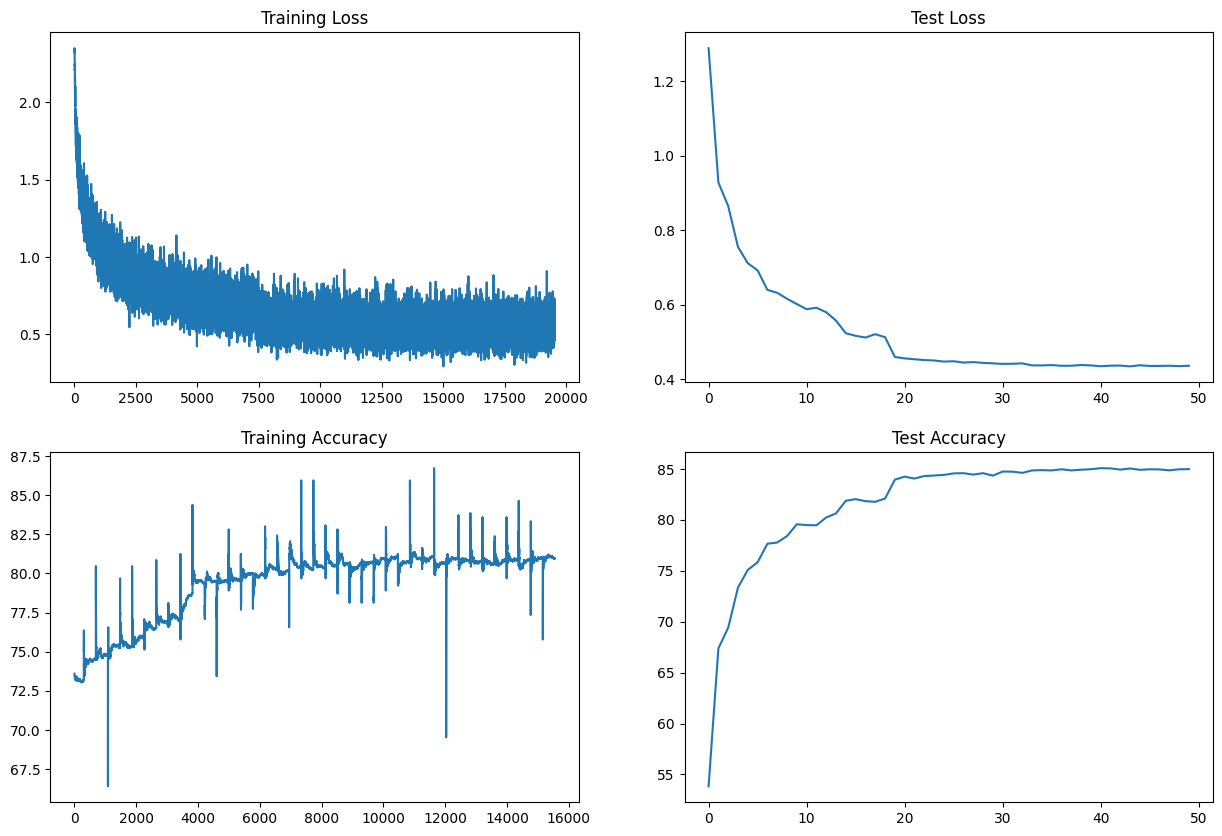

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_graphs(train_losses , train_acc , test_losses , test_acc)

# Plotting Misclassified Images

In [16]:
misclassified_images, predictions, labels = get_misclassified_images(model, test_loader, device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


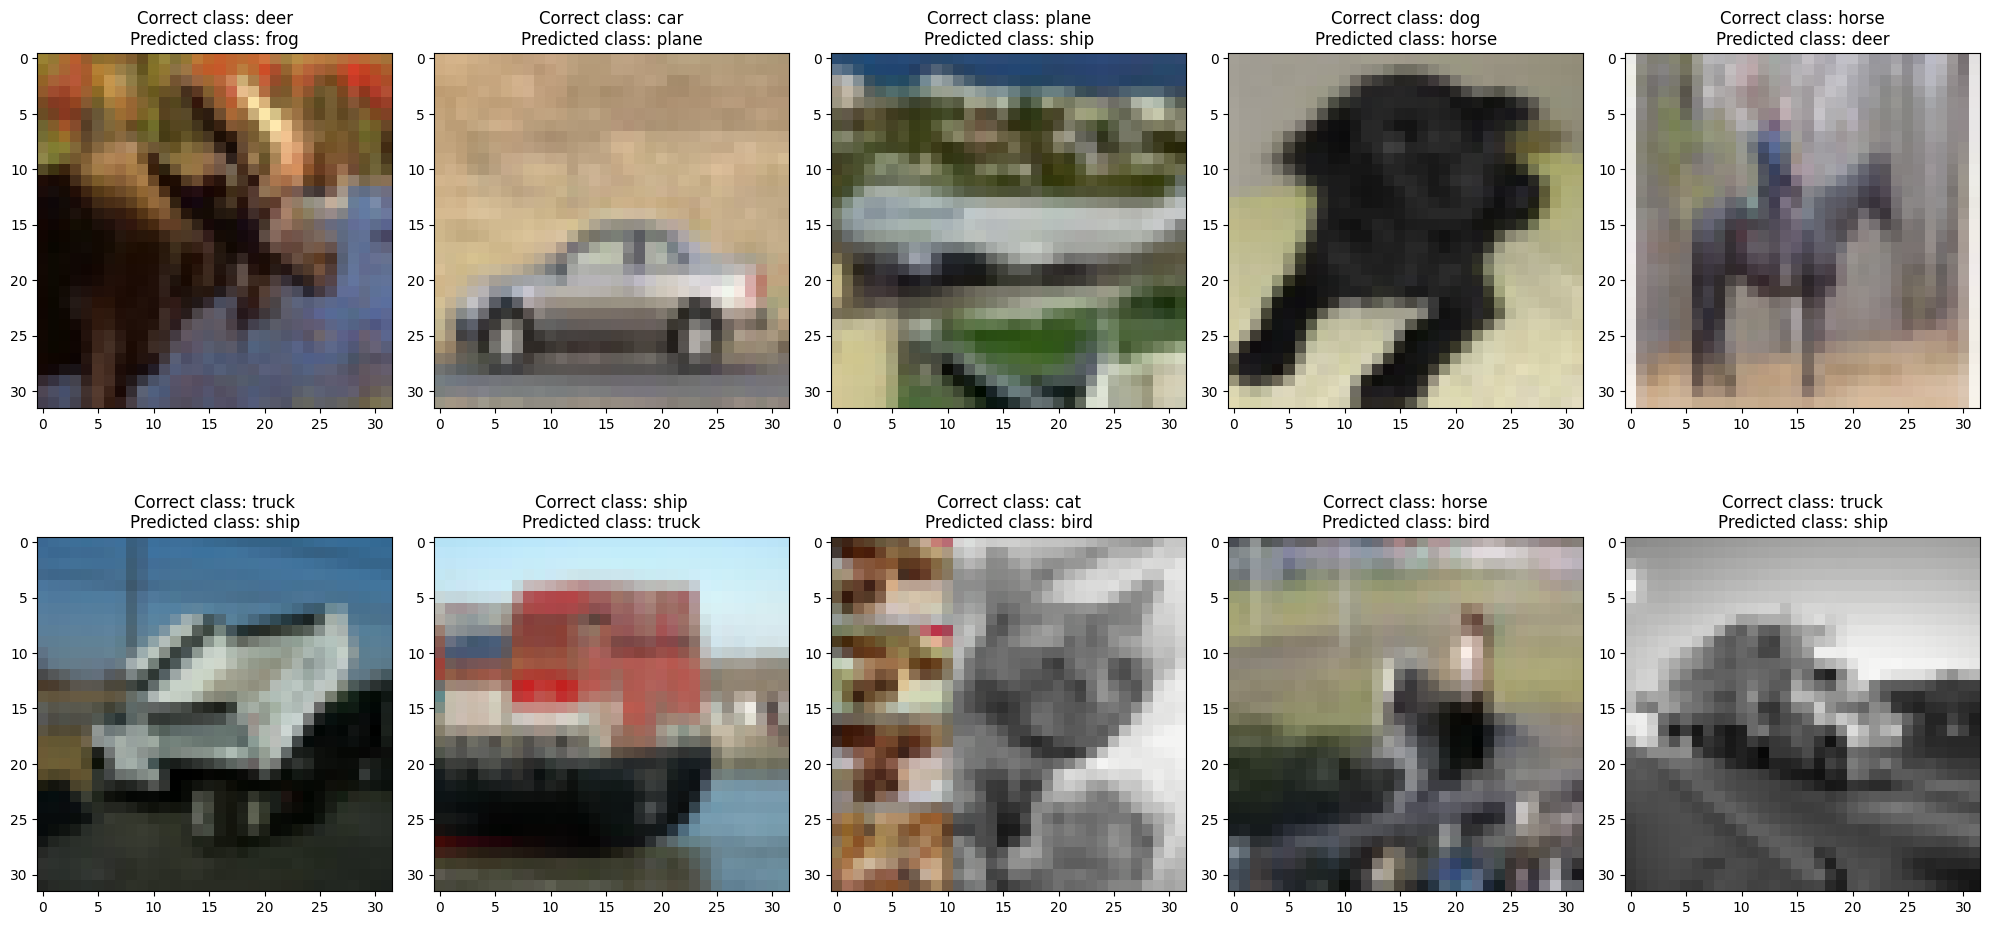

In [17]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    classes,
)